# Assignment 2

In [1]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

#To get access to a dataset
from sklearn import datasets

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import seaborn as sns #seaborn is a package for nice-looking graphics

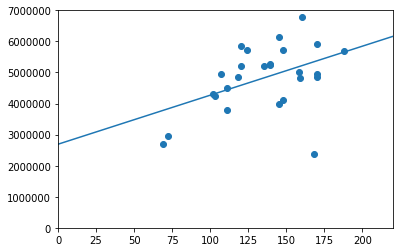

In [2]:
# Data, x is area and y is price
x = np.array([[120], [107], [135], [145], [168], [69], [170], [160], [170], [158], [103], [148], [139], [118], [159], [188], [148], [120], [111], [102], [145], [139], [170], [111], [124], [72] ])
y=np.array([[5850000],[4960000],[5200000],[6150000],[2360000],[2700000],[5930000],[6800000],[4850000],[5000000],[4245000],[5725000],[5275000],
            [4850000],[4825000],[5700000],[4100000],[5200000],[4500000],[4300000],[4000000],[5250000],[4950000],[3800000],[5725000],[2950000]])

#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(x, y)

#create the regresion line
xfit = np.linspace(0, 220, 1000) #1000 evenly spaced points in [0, 220].
yfit = model.predict(xfit[:, np.newaxis])

# scatter plot of actual data
plt.scatter(x, y)
# plot of regression line
plt.plot(xfit, yfit)
# set axis range
plt.gca().set_ylim(0,7000000)
plt.gca().set_xlim(0,220)
plt.show()

In [3]:
#Slope of the line:
model.coef_

array([[15780.95631313]])

In [4]:
#Intercept of the line:
model.intercept_

array([2691439.76386015])

In [5]:
#Predicting price of houses with an area of 100, 150, 200:
model.predict([[100],[150],[200]])

array([[4269535.39517298],
       [5058583.2108294 ],
       [5847631.02648582]])

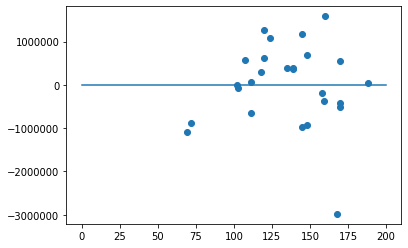

In [6]:
#Calculate residuals
residual = y-model.predict(x)
# scatter plot of residuals
plt.scatter(x, residual)
# Draw the x axis to make it more clear if the residuals are negative or positive
xaxis = np.linspace(0, 200, 2) #1000 evenly spaced points in [0, 55].
y0 = np.linspace(0,0,2) # two y = 0 values
plt.plot(xaxis, y0)
plt.show()

## Discussion

### Accuracy
From looking at the linear regression and the scatter plot we can probably say that the price follows a linear trend, it doesnt seem like it could be quadratic or logarithmic for example. This makes sense from a geographical perspective since the area of the house is most likely somewhat proportional to the area of the entire space the house and garden occupies. And the total space is probably proportional to what that land costs to buy from the state. 

The intercept value of 2700000 could seem weird since it implies a house with an area close to zero would be very expensive even though it is practically useless. However you have to take into consideration that houses like these don't exist so we can still probably say that this model is reasonable for normal houses on the low end of the size spectrum.

However the regression has some pretty large residuals which indicates that many other factors could play into the pricing. Below we will discuss the relation between the area and the price as well as some possible factors to incorporate in the regression, that are explained in the next chapter.

An aspect of the house's value could be the price it costs to build. This cost should probably not be proportional to the size. To explain this, say we could either build one house or two houses with half the size. It is most likely going to be more expenisve to build the two houses since you need to redo some of the initial effort twice, such as paperwork, digging and installing water infrastructure and electricity. Furthermore, the big house probably takes a bit less material to build if we make a rough assumption that they have the same shape. It will need twice the amount of roof and flooring but not as much material for walls. This can be explained by taking a square house as an example. A square with an area of 4 has the circumfrence of 8, but a square with an area of 8 only has a circumfrence of 11.3, which is not double. We do not know if these assumptions are correct, there are probably many other factors that go into the cost of building a house but it is important to have this in mind.

It is also possible that the derivate of the price could increase more as the area increases. One reason for this could be that a bigger house is more likely to come with expensive things like a pool, more high tech electronics built in and a more modern kitchen. 

### Improvements

The model could be improved by integrating the size of the garden in the regression. This could be done by doing a multidimensional regression where the price is the z axis, house area is the x axis and garden area is the y axis. One could probably expect the price to be proportional to the garden area.

Another dimension could be the number of rooms the house has. For a family it could be more valuable to have 6 rooms than 3 for example. However, one should not expect the value to increase proportionally to the number of rooms since a house with a thousand rooms but a somewhat normal area of 150 m^2 would be very inconvenient. Meaning the regression should not be linear with respect on this dimension. For this reason, it is also possible that less rooms could be more valueable if the house itself is smaller. This means that the regression might need to incorporate a term containing a product of the number of rooms and the area of the house in the expression for the final price.

The date the house was put up for sale could also play a role in the final price, hence it could be used as a dimension in the regression. The date could be important if people are more likely to be interested in buying houses during the spring and summer than during the winter for example. The price should therefore not be proportional to the date it was listed, the dependency can probably be modelled as a sinus curve with a period of one year. 

Another dimension could be the distance to the city. One could expect the price to increase the closer the house is to the city but it is hard to say what the relation would be. The price could increase linearly the closer it is but it could also be exponentially, logarithmically and quadratically.



Uniform and distance based wighting has very good accuracies of 97,8%  up until k=25. After that point the uniform classification gets progressively worse down to 24,4% accuracy but the distance based stays the same.

To understand this we look at the edge case where k is equal to the number of data points in the training data. For uniform classifications, when we add a new point from the test data it will calssify itself by looking at its k closest neighbours and classifying itself as whatever flowers occurs the most. This will always be the flower that occurs the most in the training data overall since it looks at every point in the training data. This means that the uniform classifications will get worse accuracy as k grows really large since it approaches the edge case described above. 

The distance weighted classification on the other hand will mainly take the points closest to the test data into account even when k grows large, meaning it will act more similarly to what it does when a small k is used.

A small k means that the classifications only look at the closest points, meaning test flowers are less likely to become calssified as a flower that has very different properties.

A small k could give rise to overfitting if there are outliers of some type of flower A within a cluster of another type of flower B. This would mean that some flowers of type B would incorrectly by classified as the same type as the outlier of type A. We don't see the test with small k values suffer of low accuracy which might be because the anount of data is too small. Meaning that it is very unlikely that flowers of type B would end up inside the boundaries of the outliers of type A.

Judging from the accuracy alone, a distance based classification seems to be superior if one doesnt want to analyze an appropriate k value. However, one could expect it to have worse performance since it needs to to more clalculations which means it could still be worth it to use the uniform classification if it is easy to determine an appropriate k value.